<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/convnet_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# convnet to classifiy MNIST
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets.mnist import load_data
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import plot_model

(60000, 28, 28)


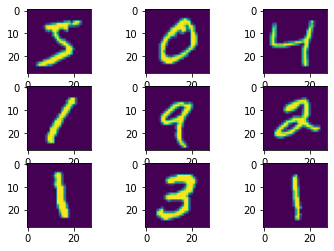

In [7]:
(xtrain, ytrain), (xtest, ytest) = load_data()

print(xtrain.shape)

xtrain = xtrain.reshape(60000, 28, 28, 1)
xtrain = xtrain.astype('float32')/255.

xtest = xtest.reshape(10000, 28, 28, 1)
xtest = xtest.astype('float32')/255.

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

# create a grid of 3x3 images
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  plt.imshow(xtrain[i].reshape(28, 28))


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convnet1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
convnet2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
convnet3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
FCL1 (Dense)                 (None, 64)               

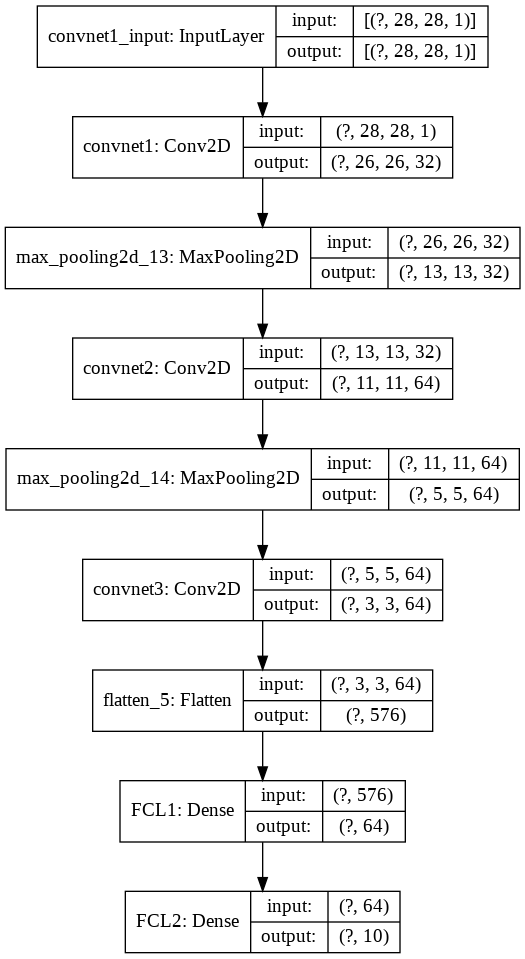

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), name='convnet1'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', name='convnet2'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', name='convnet3'))
model.add(Flatten())
model.add(Dense(64, activation='relu', name='FCL1'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
plot_model(model, to_file='MNIST_CNN.png', show_shapes=True, show_layer_names=True)

Epoch 1/5
750/750 [==============================] - 47s 63ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0160 - val_accuracy: 0.9958
Epoch 2/5
750/750 [==============================] - 48s 64ms/step - loss: 0.0126 - accuracy: 0.9962 - val_loss: 0.0186 - val_accuracy: 0.9946
Epoch 3/5
750/750 [==============================] - 47s 62ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.0246 - val_accuracy: 0.9942
Epoch 4/5
750/750 [==============================] - 47s 63ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.0344 - val_accuracy: 0.9893
Epoch 5/5
750/750 [==============================] - 47s 63ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0237 - val_accuracy: 0.9939
Accuracy: 99.23%
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.010798233747482299
Training and validation loss    :  0.010798233747482299 0.023471851646900178
Training and validation accuracy:  0.9966416597366333 0.9935666680335998
313/313 [============================

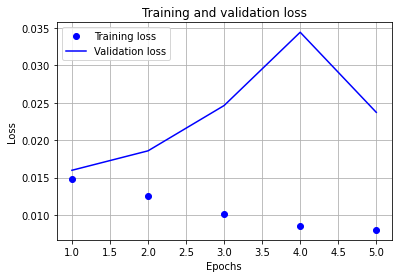

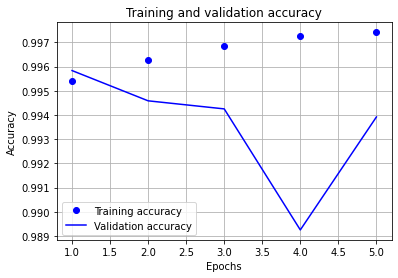

In [21]:
# To get reproducible results in keras
np.random.seed(1)

history = model.fit(xtrain, ytrain, epochs=5, batch_size=64, verbose=1, validation_split=0.2)

# Final evaluation of the model
scores = model.evaluate(xtest, ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# plot loss and accuracy
print(history.history.keys())
loss = history.history['loss']
print(np.mean(loss))
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

y_pred = model.predict(xtest)
score = model.evaluate(xtest, ytest)
print('accuracy :', score)

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

In [22]:
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 convnet1 (None, 26, 26, 32)
1 max_pooling2d_13 (None, 13, 13, 32)
2 convnet2 (None, 11, 11, 64)
3 max_pooling2d_14 (None, 5, 5, 64)
4 convnet3 (None, 3, 3, 64)
5 flatten_5 (None, 576)
6 FCL1 (None, 64)
7 FCL2 (None, 10)


Model: "functional_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convnet1_input (InputLayer)  [(None, 28, 28, 1)]       0         
_________________________________________________________________
convnet1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
convnet2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
convnet3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________

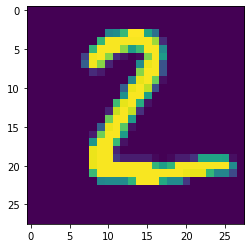

(1, 3, 3, 64)
[[0.       0.       0.      ]
 [0.       0.       0.      ]
 [0.644201 0.260174 0.      ]]


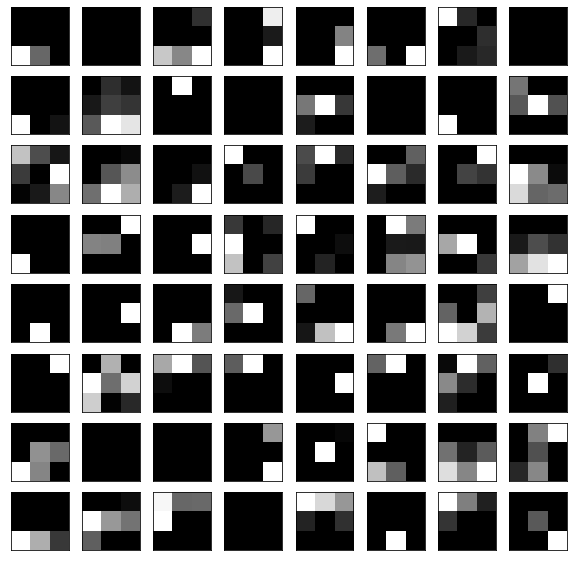

In [43]:
# display feature maps of convnet3
sub_model = Model(inputs = model.input, outputs = model.layers[4].output)
sub_model.summary()
plot_model(sub_model, to_file='MNIST_conv_layers.png', show_shapes=True, show_layer_names=True)

# convert the image to an array
img = xtest[1]

print(img.shape)

img = np.expand_dims(img, axis=0)
print(img.shape)

plt.figure()
plt.imshow(img.reshape(28,28))
plt.show()

feature_maps = sub_model.predict(img)

print(feature_maps.shape)

print(feature_maps[0,:,:,0])

# create a grid of 8x8 images
plt.figure(figsize=(10, 10))

for i in range(8*8):
    # display original
    ax = plt.subplot(8, 8, i + 1)
    #plt.imshow(features[0])
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()